In [14]:
from IPython.display import Image

## Differentiation of function 

### 1. Use dervative() of scipy.misc package.
misc is short term of miscellaneous <br>
[scipy.misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

scipy.misc.derivative(func, x0, dx=1.0, n=1 : order of derivative, args=(), order=3 : accuracy order)

algorith of derivative() : 2nd order method

$$ {f(x_0+h)-f(x_0-h)}\over{2h} $$

In [2]:
import scipy.misc as sm
from numpy import *

In [6]:
sm.derivative(sin,pi/3.0,dx = 1)

0.4207354924039484

### 2nd order method
$$ {f(x_0+h)-f(x_0-h)}\over{2h} $$

In [7]:
(sin(pi/3.0+1)-sin(pi/3.0-1))/2

0.4207354924039484

### 1st order method
$$ {f(x_0+h)-f(x_0)}\over{h} $$

In [5]:
(sin(pi/3.0+0.1)-sin(pi/3.0))/1

0.045590188541076104

#### example2
Find the second derivative of$ x^2e^(-x^2)$
at x = 1.0. Do this with dx=0.2. 
Compare the results of 3 and 5 points-calculations and the exact value, -1.47152

In [8]:
def f(x) :
    y = x**2*exp(-x**2)
    return y

In [10]:
sm.derivative(f, 1.0, dx = 0.2, n = 2, order =3)

-1.4278939613269548

In [11]:
sm.derivative(f, 1.0, dx = 0.2, n = 2, order =5)

-1.4694567402024712

High accuracy : set order on derivative()
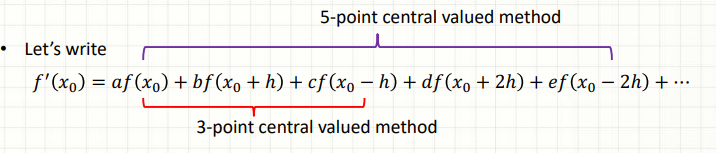

## differentiation of data

The same as the function case, but h is fixed by the data spacing

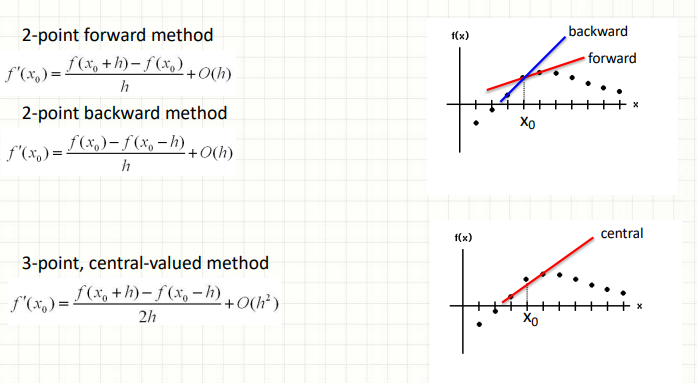


#### Use gradient()
It returns the list of derivatives at all the data points.<br>
[numpy.gradient]("https://numpy.org/doc/stable/reference/generated/numpy.gradient.html")

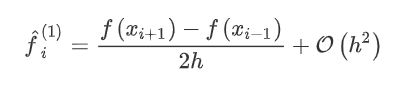

Example 3. Find derivatives of a list y=[1,2,4, 8,16,32,64,128,256,512], with 
the spacing between the data points 0.1. Plot y and its derivative.

In [15]:
from numpy import *

In [16]:
y=[1,2,4,8,16,32,64,128,256,512]

In [17]:
gradient(y, 0.1)

array([  10.,   15.,   30.,   60.,  120.,  240.,  480.,  960., 1920.,
       2560.])

#### Derivatives at the Edge of Data(edge order1)
Forward (left edge) or backward (right edge) method can be used, but the 
accuracy is low.

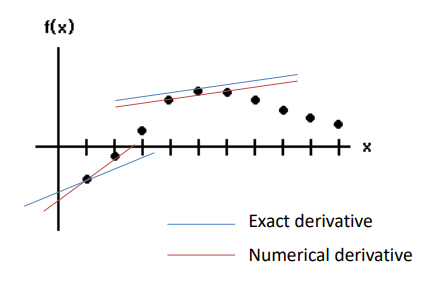

Example 4. Repeat three time successively the differentiation of discrete data 
[$exp(x_n)$], where $x_n=0$.1n with n going from 0 through 20. Plot the results and 
see how fast the error of the edge-derivative grows.

In [18]:
 from numpy import *; import matplotlib.pyplot as plt

In [20]:
x=arange(0,2, 0.1)
y=exp(x)

In [21]:
z=gradient(y, 0.1); z2=gradient(z, 0.1); z3=gradient(z2, 0.1)

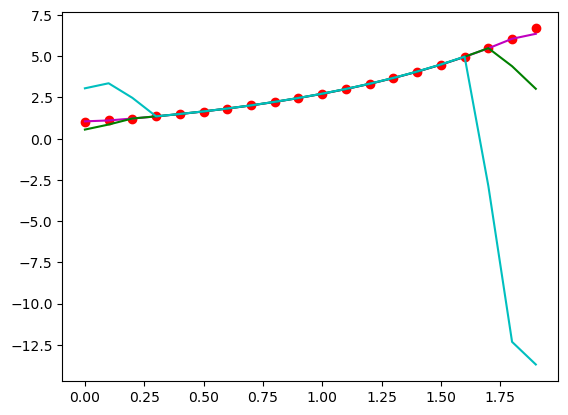

In [30]:
 plt.plot(x,y,'or')
 plt.plot(x,z,'-m')
plt.plot(x,z2,'-g')
plt.plot(x,z3,'-c')
 plt.show()

Example 5. Do the Example 4 but this time, with a smaller spacing, i.e. 0.02

In [31]:
 from numpy import *; import matplotlib.pyplot as plt

In [34]:
x=arange(0,2, 0.02)
y=exp(x)

In [35]:
z=gradient(y, 0.1); z2=gradient(z, 0.1); z3=gradient(z2, 0.1)

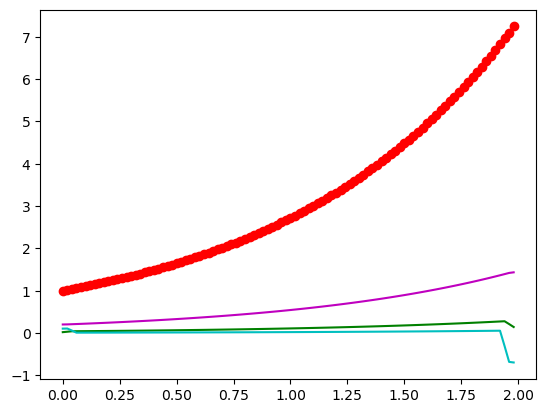

In [38]:
 plt.plot(x,y,'or')
 plt.plot(x,z,'-m')
plt.plot(x,z2,'-g')
plt.plot(x,z3,'-c')
 plt.show()

#### Derivatives at the Edge of Data(edge order2)

Extrapolate an outward point, using the quadratic polynomial determined by 
three inward contiguous points.
Apply the central-valued scheme using the extra point

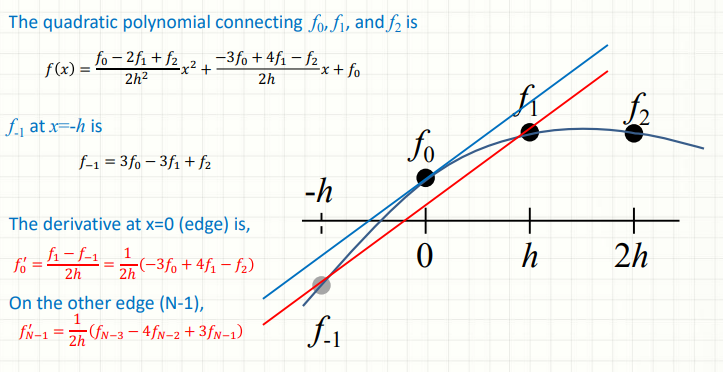

Example 6. Do the same job as in Example 4, but with the edge order two this 
time. You put ‘edge_order=2’ as a third argument of gradient().


In [40]:
 from numpy import *; import matplotlib.pyplot as plt

In [41]:
x=arange(0,2, 0.02)
y=exp(x)

In [42]:
z=gradient(y, 0.1, edge_order = 2); z2=gradient(z, 0.1, edge_order = 2); z3=gradient(z2, 0.1, edge_order = 2)

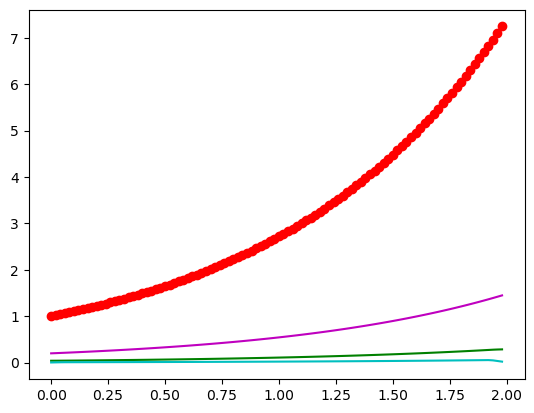

In [43]:
 plt.plot(x,y,'or')
 plt.plot(x,z,'-m')
plt.plot(x,z2,'-g')
plt.plot(x,z3,'-c')
 plt.show()

## Numerical Integration by Quadrature
‘quadrature’ means the process of constructing a square with an area equal to 
that of a figure bounded by a curve.

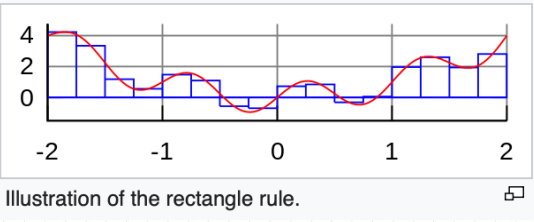

### Evenly and Non-evenly quadrature
-Newton-Cotes Quadrature Rules and 
corresponding Python Functions<br>
Mid-point rule
Trapezoid rule → trapz() for data.
Simpson’s rule → simps() for data.
Romberg Integral → romb() for data or 
romberg() for functions.
etc

-Non-evenly Spaced Quadrature Rules and 
corresponding Python Functions<br>
Gaussian quadrature → quadrature()
Clenshaw-Curtis quadrature → quad() 
etc

#### Trepezoid rule

$$ \int_{a}^{b} f(x) dx = {{h}\over{2}}[f(a)+f(b)] + O(f''h^3) $$

#### Integration by quad( ) function

Example 7. Calculate $ \int_{0}^{4} x^2dx$

In [44]:
from scipy import integrate

In [45]:
x2 = lambda x : x**2

In [46]:
integrate.quad(x2,0,4)

(21.333333333333336, 2.368475785867001e-13)

Results and upper bound of error

Example 8. Calculate $ \int_{0}^{\infty} x^{2}e^{-\alpha x^{2}}dx$

In [48]:
 import scipy.integrate as intg

In [49]:
import numpy as np

In [50]:
f=lambda x, a: np.exp(-a*x**2)*x**2

In [51]:
intg.quad(f, 0, np.inf, args=(2, ) )
#args means extra arguments : that is, a =2

(0.15666426716443754, 7.956009355758829e-11)

## Double integration of function

Use dbquad(function, x_low limit, x_high limit, y_low limit, y_high limit,args=(),)
For triple integration , tplquad()

Example 9. Integrate $ e^{-x^2-y^2}$ over a circle centered at the origin and with  radius 3

In [52]:
import numpy as n

In [53]:
 from scipy.integrate import dblquad

In [54]:
 f=lambda x,y : np.exp(-x**2-y**2)

In [55]:
g=lambda x: -np.sqrt(9-x**2)
h=lambda x: np.sqrt(9-x**2)

In [56]:
dblquad(f, -3, 3, g, h)

(3.1412049502558874, 1.3804318094367376e-08)

## Integration of Data

use trapz(data, x, dx, axis) from numpy

In [57]:
 import numpy as np

In [58]:
data=[1,2,3]

In [59]:
np.trapz(data)

4.0

In [60]:
x=[-0.1,0,0.1]; np.trapz(data,x)

0.4

In [61]:
np.trapz(data,dx=0.1)

0.4

Example 11. Run the following routine

In [62]:
import numpy as np

In [63]:
data=[[1,2,3,4],[2,3,4,5],[3,4,5,6]]

In [64]:
np.trapz(data,axis=0)

array([ 4.,  6.,  8., 10.])

In [65]:
np.trapz(data,axis=1)

array([ 7.5, 10.5, 13.5])

Other method : simps(data, x, dx, axis), romb(data, dx, axis)

Example 12. Generate a data set, where the elements are the values of 
function x2+x+1 for x from 0 through 3.2 with spacing 0.2. Integrate the data 
with trapz(), simps(), and romb(). Compare the result with the more accurate 
value obtained from function integration by quad(). 

In [66]:
import numpy as np

In [67]:
from scipy.integrate import trapz, simps, romb, quad

In [68]:
f=lambda x: x**2+x+1 

In [69]:
data = [f(x) for x in np.arange(0,3.4,0.2)]

In [70]:
 trapz(data,dx=0.2); simps(data,dx=0.2); romb(data,dx=0.2)

19.24266666666667

In [71]:
quad(f,0,3.2)

(19.242666666666665, 2.1363651588520343e-13)